# TP FITTING - Etude de déploiements

##Préparer par:
**Rami EL FEGHALI - Sory BARRY**

## 1. Objectif

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## 2. Intensité du processus



### Question 1

Nous allons considerer les stations de base de l'opérateur Orange pour LTE.

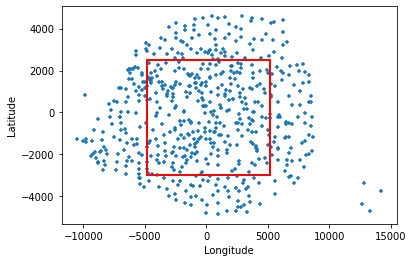

In [ ]:
df  = pd.read_csv("sfr_umts.csv")
df.plot(kind='scatter',x='Longitude',y='Latitude', marker='+') # scatter plot

#a changer a la main 
left, bottom, width, height = (-4800, -3000, 10000, 5500)





rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="red",
                       linewidth=2)
plt.gca().add_patch(rect)

### Question 2

In [ ]:
def calcul_nb_base(df,left, bottom, width, height):
  nb=0
  limit_x_1= left
  limit_x_2= left + width
  limit_y_1= bottom
  limit_y_2= bottom + height

  for index,j in df.iterrows():
    if (j['Longitude'] > limit_x_1 and j['Longitude'] <limit_x_2 and j['Latitude'] >  limit_y_1 and j['Latitude'] < limit_y_2 ):
        nb=nb+1
  return nb

nbr_de_point_fenetre = calcul_nb_base(df,left, bottom, width, height)
surface=  width * height

l= nbr_de_point_fenetre/surface
print("lambda = ", l ,"( nb de station par metre)")

lambda =  5.0181818181818186e-06 ( nb de station par metre)


## 3. Calcul des fonctions F, G et J

### Question 3

In [ ]:
#calcul des positions des points dans la fenetre
def calcul_position_fenetre(df):
  nb=0
  limit_x_1= left
  limit_x_2= left + width
  limit_y_1= bottom
  limit_y_2= bottom + height
  position=[]
  for index,j in df.iterrows():
    if (j['Longitude'] > limit_x_1 and j['Longitude'] <limit_x_2 and j['Latitude'] >  limit_y_1 and j['Latitude'] < limit_y_2 ):
        position.append([j['Longitude'],j['Latitude']])
  return position

#array contenant les coordonnees des BS a l'interieur de la fenetre
array_fenetre= np.array(calcul_position_fenetre(df))
df_fenetre= pd.DataFrame(array_fenetre,columns =['Longitude','Latitude'])


In [ ]:
len(array_fenetre)

276

In [ ]:
def distance(x,y):
  X=[float(x[0]),float(x[1])]
  Y=[float(y[0]),float(y[1])]
  return np.sqrt((X[0]-Y[0])**2+(X[1]-Y[1])**2)

def distance_plus_proche(point):
  #tirage d'un point aleatoire dans la fenetre
  d=1000000

  nb=0
  for t,i in df.iterrows(): 
    bts= [i['Longitude'],i['Latitude']] # coordonné d'une bts
    tmp=distance(point,bts)
    #condition pour eviter de prendre le voisin le plus proche comme etant le point choisi
    if(tmp!=0 and tmp<d):
        d= tmp

  return d


def F(rayon,distance_plusProche_voisin_points):
  nb=0
  for d in distance_plusProche_voisin_points:
    if(d<=rayon):
        nb=nb+1
  return nb/len(distance_plusProche_voisin_points)


In [ ]:
#tirage des 1000 points
points=[]
for i in range(1000):
    point=[np.random.uniform(left, left+ width),np.random.uniform(bottom, bottom + height)]
    points.append(point)

#calcul de la distance du plus proche voisin pour chaqu'un des points tirés
distance_plusProche_voisin_points_f=[]
for i in points:
  distance_plusProche_voisin_points_f.append(distance_plus_proche(i))

In [ ]:
#Calcul de la fonction f en variant r de 1 a 700 par pas de 0,1

tmp1_f=[]
for r in range(7001):
  f= F(r/10,distance_plusProche_voisin_points_f)
  tmp1_f.append([r,f])

Text(0.5, 1.0, 'f en fonction du rayon en décimètre')

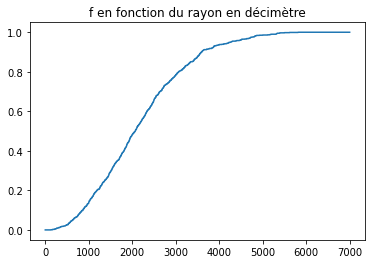

In [ ]:
#plot du resultat, f en fonction de r
tmp2_f= np.array(tmp1_f)
tmp2_f_X= tmp2_f[:,0]
tmp2_f_Y= tmp2_f[:,1]

plt.plot(tmp2_f_X,tmp2_f_Y)
plt.title("f en fonction du rayon en décimètre")

### Question 4

In [ ]:
def G(rayon,distance_plusProche_voisin_points):
  nb=0
  
  for d in distance_plusProche_voisin_points:
    if(d<=rayon ):
      nb=nb+1
  return nb/len(distance_plusProche_voisin_points)

In [ ]:
#calcul de la distance du plus proche voisin pour 
#chaqu'une des stations de base de la fenetre

distance_plusProche_voisin_points_g=[]
for i in array_fenetre:
  distance_plusProche_voisin_points_g.append(distance_plus_proche(i))

In [ ]:
#Calcul de la fonction g en variant r de 1 a 700 par pas de 0,1

tmp1_g=[]
for r in range(7001):
  g= G(r/10,distance_plusProche_voisin_points_g)
  tmp1_g.append([r,g])

Text(0.5, 1.0, 'g en fonction du rayon en décimètre')

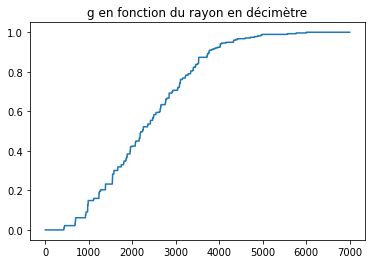

In [ ]:
#plot du resultat, f en fonction de r
tmp2_g= np.array(tmp1_g)
tmp2_g_X= tmp2_g[:,0]
tmp2_g_Y= tmp2_g[:,1]

plt.plot(tmp2_g_X,tmp2_g_Y)
plt.title("g en fonction du rayon en décimètre")

### Question 5

In [ ]:
#Calcul de la fonction j
tmp1_j=[]
for r in range(3001):
  tmp1_j.append([r,(1-tmp1_g[r][1])/(1-tmp1_f[r][1])])

Text(0.5, 1.0, 'j en fonction du rayon en décimètre')

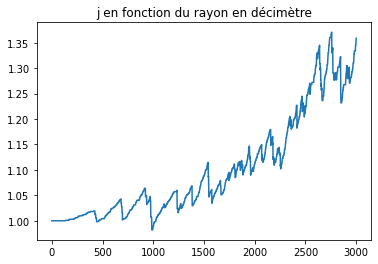

In [ ]:
#plot du resultat, f en fonction de r
tmp2_j= np.array(tmp1_j)
tmp2_j_X= tmp2_j[:,0]
tmp2_j_Y= tmp2_j[:,1]

plt.plot(tmp2_j_X,tmp2_j_Y)
plt.title("j en fonction du rayon en décimètre")

### Question 6

La fonction J est supérieure à 1 et donc le processus ponctuel est répulsif.

## 4. Fitting

### Question 7

In [ ]:
beta= 1
condition= True
tmp_E=float('inf')
while condition:
  E=0

  for r in range(3001):
    tmp=1/(1-beta+beta*np.exp(-(l*np.pi*(r/10)**2)/beta))
    E=E+(tmp-tmp2_j_Y[r])**2

  if(E>tmp_E):
    condition= False
  else:
    tmp_E=E
    beta=beta-0.01
# le beta qu'on cherche est celui juste avant que la variation
beta_final=beta +0.01
print("La valeur de beta est : ", round(beta_final,2)) 

La valeur de beta est :  0.15


### Question 8

In [ ]:
j_theo=[]

for r in range(3001):
  tmp=1/(1-beta_final+beta_final*np.exp(-(l*np.pi*(r/10)**2)/beta_final))
  j_theo.append(tmp)

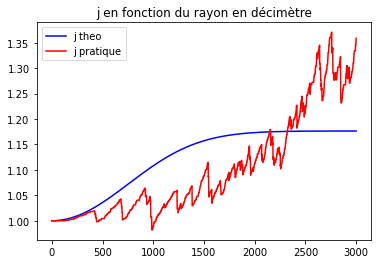

In [ ]:
#plot du resultat, f en fonction de r

plt.plot(tmp2_j_X,j_theo,"-b",label="j theo")
plt.plot(tmp2_j_X,tmp2_j_Y,"-r",label="j pratique")
plt.title("j en fonction du rayon en décimètre")
plt.legend()

### Question 9

## 5. Stratégie de déploiement

### Question 10

En changeant les données d'excel dans le debut du code et en faisant un run à chaque fois on tire les valeurs suivantes:

* bt_gsm:\
  lambda= 4.418181818181818e-06 et beta = 0.69

* bt_lte:\
  lambda= 4.381818181818182e-06 et beta = 0.58

* bt_umts:\
  lambda= 4.527272727272727e-06 et beta = 0.54

* free_lte:\
  lambda= 2.581818181818182e-06 et beta = 1

* free_umts:\
  lambda= 2.581818181818182e-06 et beta = 1

* o_gsm:\
  lambda= 4e-06 et beta = 0.66

* o_lte:\
  lambda= 3.818181818181818e-06 et beta = 0.75

* o_umts:\
  lambda= 4.0727272727272725e-06 et beta = 0.74

* sfr_gms:\
  lambda= 4.5454545454545455e-06 et beta = 0.14

* sfr_lte:\
  lambda= 4.490909090909091e-06 et beta = 0.19

* sfr_umts:\
  lambda= 5.0181818181818186e-06 et beta = 0.15


### Question 11

D'après les valeurs de beta trouvées dans la question précédente, on remarque que sfr et la seule qui adopte une stratégie de déploiement proche d'un processus de Poisson avec un Beta qui tend vers 0 et donc des amas de bts.\
D'autre part, bouygues, orange adoptent plutot une stratégie de déploiement selon un processus Beta-Ginibre mais pour orange il y a plus de repulsion.\
Et finalement pour free, on voit que la stratégie de deploiement est 1-Ginibre donc une repulsion maximale.